In [1]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('/content/forestfires.csv')

In [4]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
df1=df.copy()

In [6]:
df1.drop(['month','day'],axis=1,inplace=True)

In [7]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
df1.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


#Visualizations

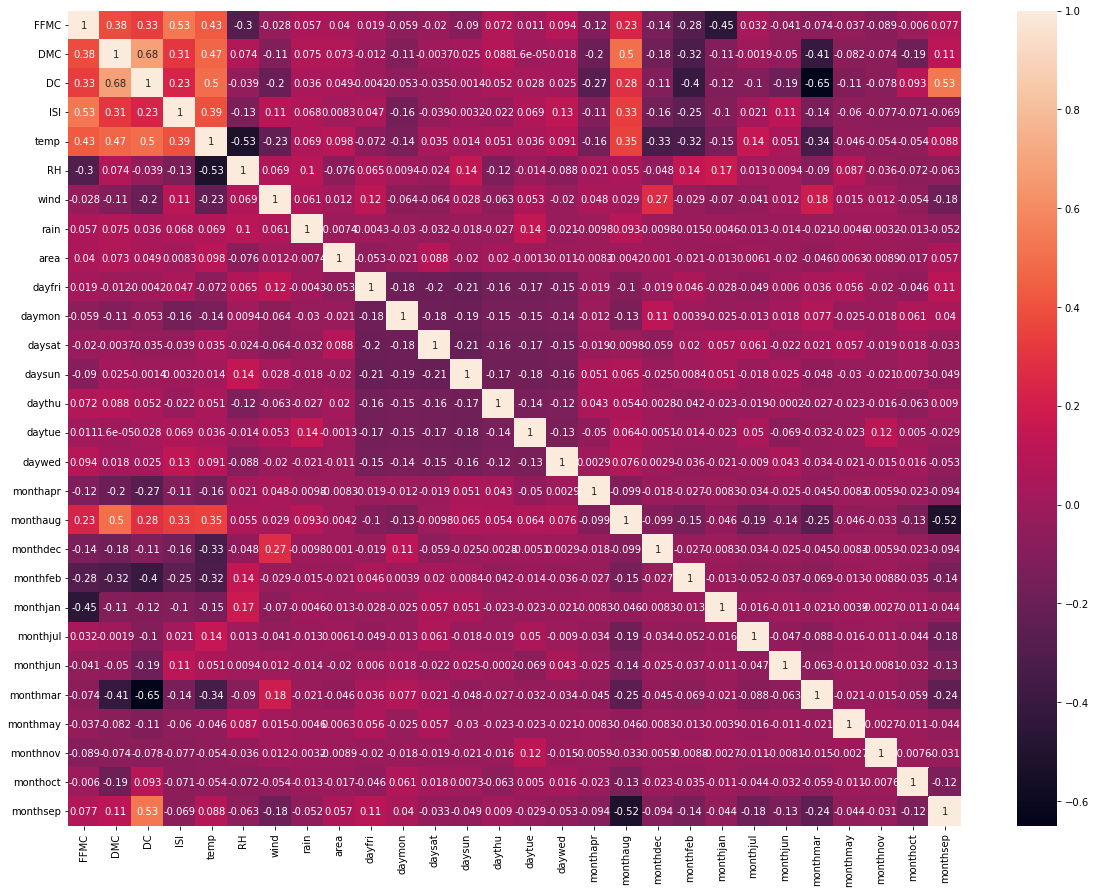

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df1.corr(),annot=True)

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <a list of 10 Patch objects>)

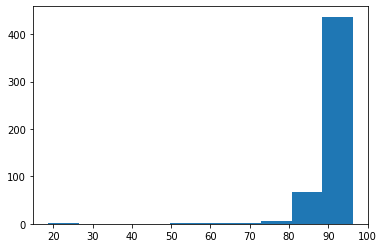

In [12]:
plt.hist(df1.FFMC)

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <a list of 10 Patch objects>)

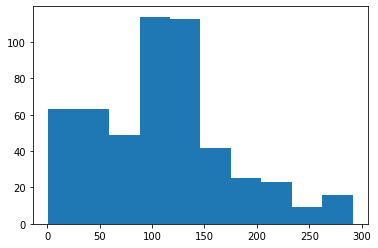

In [13]:
plt.hist(df1.DMC)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


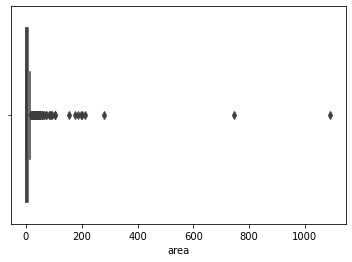

In [14]:
sns.boxplot(df1.area)
plt.show()
import warnings
warnings.filterwarnings('ignore')

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


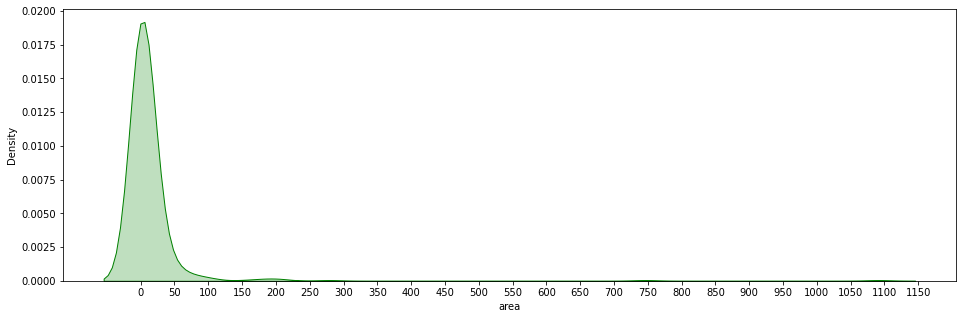

In [15]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [17]:
df2 = df1[df1.columns[0:10]]
month_colum = df2.select_dtypes(include='object').columns.tolist()

In [18]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df2,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

#Visualizing all Features

In [19]:
num_columns = df2.select_dtypes(exclude='object').columns.tolist()

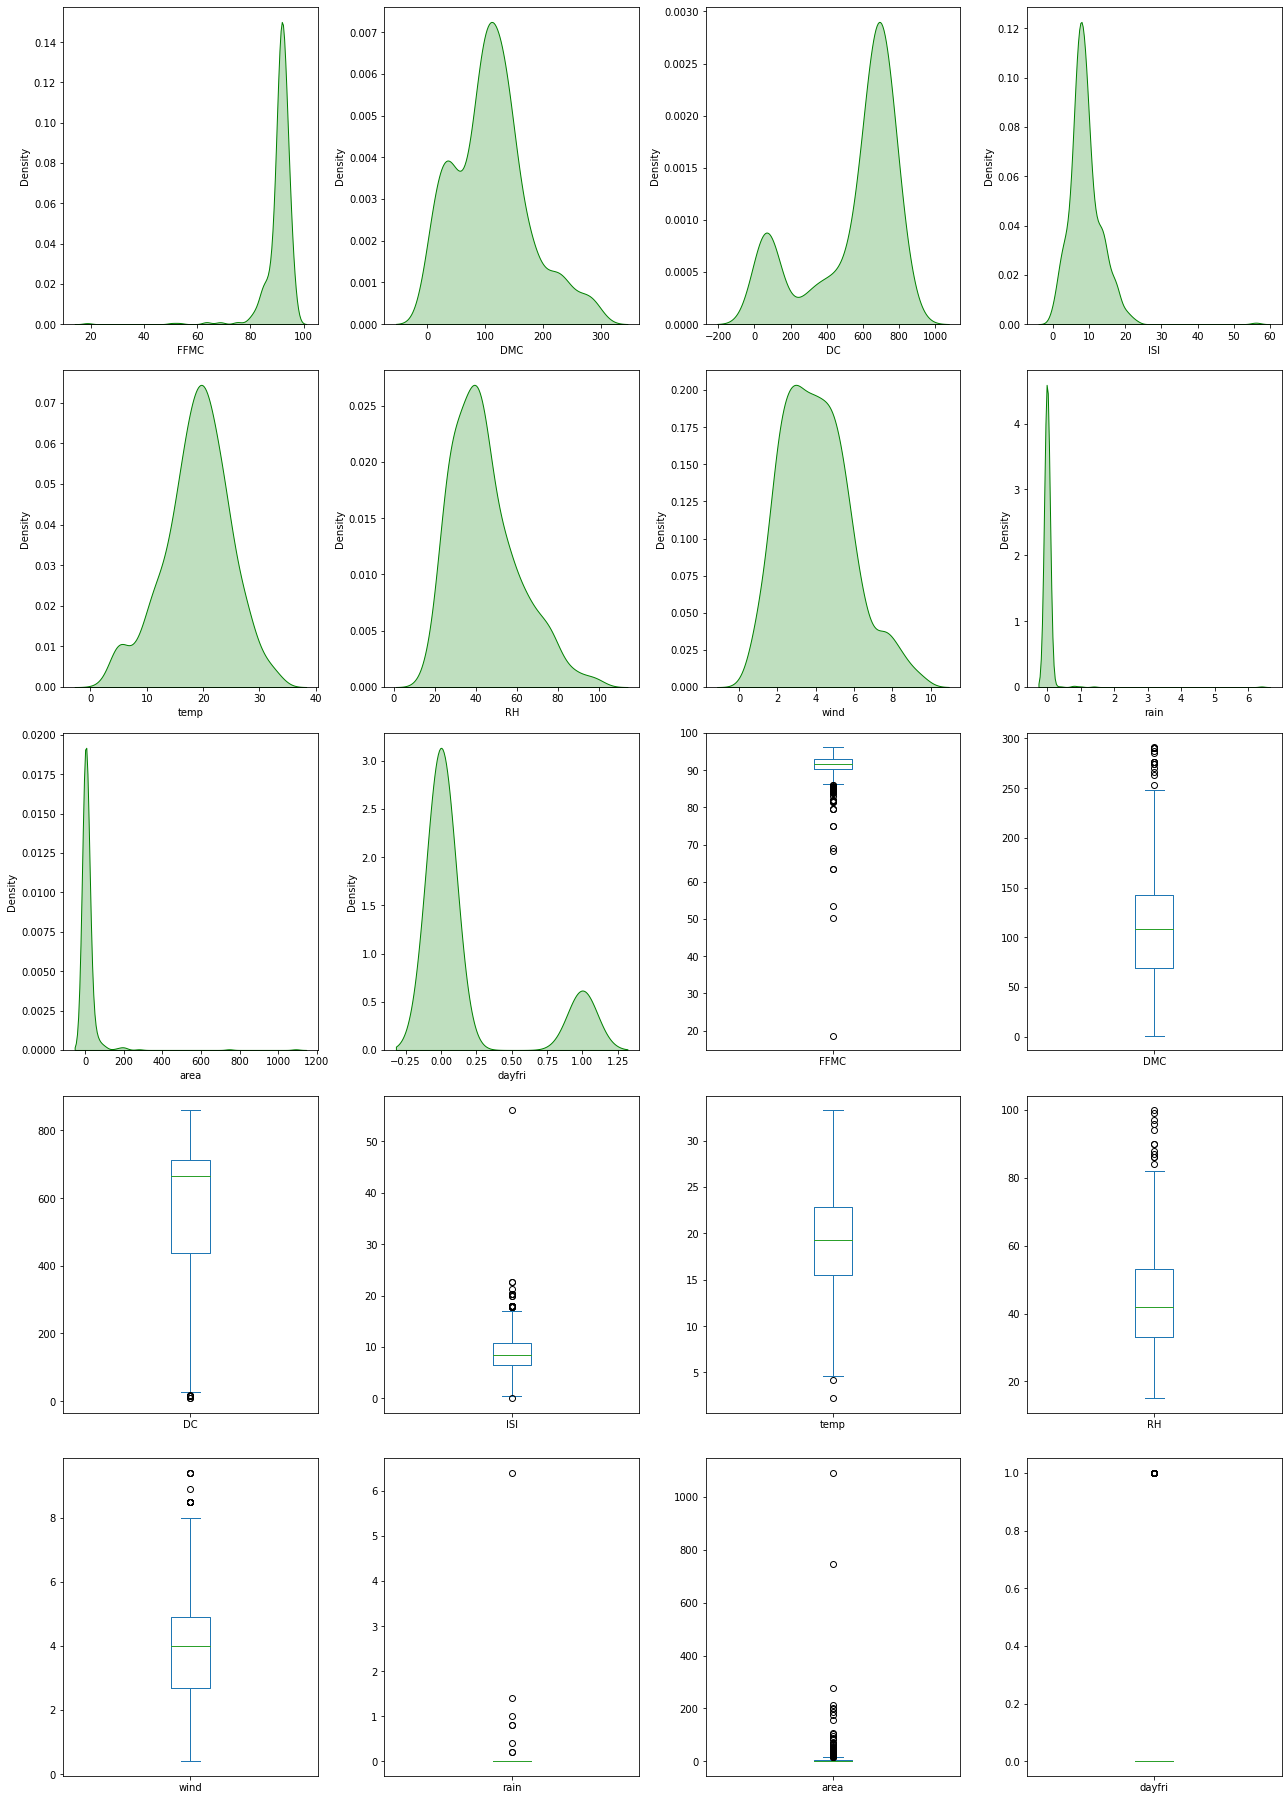

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [20]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df1[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [21]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


#Model Building

In [22]:
mapping={'small':1,'large':2}

In [23]:
df1=df1.replace(mapping)

In [24]:
x=np.array(df1.iloc[:,0:28])
y=np.array(df.iloc[:,28])

#Normalizing the data

In [25]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [26]:
X_norm=norm_func(x)

In [27]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.3,stratify = y)

In [28]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=130, batch_size=8) 

Epoch 1/130
46/46 [==============================] - 2s 3ms/step - loss: 0.6624 - accuracy: 0.9391
Epoch 2/130
46/46 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.9723
Epoch 3/130
46/46 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.9723
Epoch 4/130
46/46 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.9723
Epoch 5/130
46/46 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9723
Epoch 6/130
46/46 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9723
Epoch 7/130
46/46 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9723
Epoch 8/130
46/46 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9723
Epoch 9/130
46/46 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9723
Epoch 10/130
46/46 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9723
Epoch 11/

In [31]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9723
Accuracy: 97.23


#Conclusion

In [32]:
y_pred=model.predict(x_train)

12/12 [==============================] - 0s 3ms/step


(array([[ 34., 327.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [118., 188.,  43.,  12.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 46.,  20.,   5.,   7.,  14.,  17.,  29.,  95., 100.,  28.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [355.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [353.,   4.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [361.,   0.,

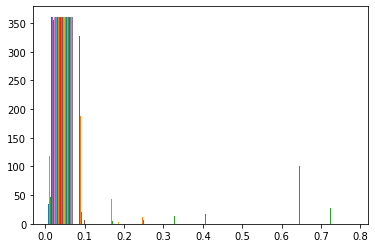

In [39]:
plt.hist(x_train)

(array([286.,  46.,  12.,   4.,   1.,   1.,   2.,   2.,   4.,   3.]),
 array([1.4584867e-04, 3.5942551e-02, 7.1739256e-02, 1.0753596e-01,
        1.4333266e-01, 1.7912936e-01, 2.1492606e-01, 2.5072277e-01,
        2.8651947e-01, 3.2231617e-01, 3.5811287e-01], dtype=float32),
 <a list of 10 Patch objects>)

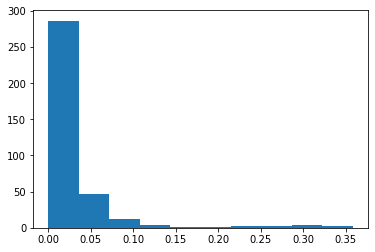

In [40]:
plt.hist(y_pred)